In [14]:
#pip install tensorflow as tf
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from PIL import Image, ImageFilter
from tensorflow.keras.utils import to_categorical

# baseline conwolutional neural network model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# Try to fix

In [2]:
# There is no variable assigned to the trained model. And the training and fitting happens
# inside a function so it is not saved. In order to fit a trained model to our own
# example picture I have to train a new model, assign it to a variable and then
# use it to classify the picture.
# define cnn model

In [3]:
# load data
(trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)


# scale the pixels
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
trainX = train_norm
testX = test_norm

In [4]:
# define model
new_model = Sequential()
new_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Flatten())
new_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
new_model.add(Dense(10, activation='softmax'))
    # compile model
opt = SGD(lr=0.01, momentum=0.9)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
#fit model
new_model.fit(trainX, trainY, epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0967 - accuracy: 0.9710
Epoch 2/10
60000/60000 [==============================] - 27s 456us/step - loss: 0.0482 - accuracy: 0.9851
Epoch 3/10
60000/60000 [==============================] - 28s 462us/step - loss: 0.0325 - accuracy: 0.9899
Epoch 4/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.0223 - accuracy: 0.9935
Epoch 5/10
60000/60000 [==============================] - 29s 487us/step - loss: 0.0154 - accuracy: 0.9957
Epoch 6/10
60000/60000 [==============================] - 29s 478us/step - loss: 0.0105 - accuracy: 0.9971
Epoch 7/10
60000/60000 [==============================] - 27s 448us/step - loss: 0.0078 - accuracy: 0.9983
Epoch 8/10
60000/60000 [==============================] - 28s 461us/step - loss: 0.0051 - accuracy: 0.9988
Epoch 9/10
60000/60000 [==============================] - 27s 456us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 10/10
60000/60000 [============

In [7]:
# evaluate model
test_loss, test_acc =new_model.evaluate(testX, testY, verbose=2)


print('\nTest accuracy:', test_acc)


Test accuracy: 0.9879999756813049


In [140]:
# load own data

def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    print(tva)
    return tva

x=imageprepare('C:/Users/justu/Documents/GitHub/hsg-imagerec/IMG8.png')



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313725490196, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32941176470588235, 1.0, 1.0, 0.3176470588235294, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4627450980392157, 1.0, 1.0, 1.0, 1.0, 1.0, 0

In [141]:
print(type(x))
# list

<class 'list'>


In [142]:
image = np.array(x, dtype='float32')

converted_image = image.reshape((1,28, 28,1)) # since we only have 1 image testX.reshape((testX.shape[0], 28, 28, 1))
# was not working. image.shape[0] indicates how many entries there are

print(type(image))
print(image.shape)

print(type(converted_image))
print(converted_image.shape)

<class 'numpy.ndarray'>
(784,)
<class 'numpy.ndarray'>
(1, 28, 28, 1)


In [143]:
# use pretrained model to predict own image

predictions = new_model.predict(converted_image)

print(predictions)
print("The hand written digit was classified as the digit :",np.argmax(predictions))

[[2.8595923e-07 1.2059520e-10 5.4283096e-06 2.7701066e-08 2.8013486e-12
  1.6665478e-09 4.3084273e-07 1.0128928e-09 9.9999380e-01 2.4745439e-09]]
The hand written digit was classified as the digit : 8


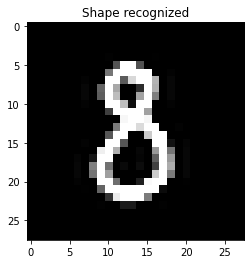

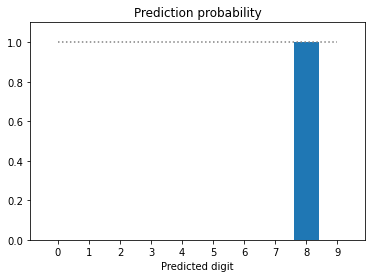

In [149]:
image = np.array(x, dtype='float')
converted_image = image.reshape((28, 28))
plt.imshow(converted_image, cmap='gray')
plt.title("Shape recognized")
plt.show()

plt.bar(np.arange(len(predictions[0])),predictions[0])
plt.xticks(np.arange(len(predictions[0])))
plt.ylim(0, 1.1)
plt.hlines(1,0,9,color='gray',linestyles='dotted')
plt.title("Prediction probability")
plt.xlabel("Predicted digit")
plt.show()